In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Style for plots
plt.style.use("seaborn-v0_8")

In [16]:
data = pd.read_csv("../data/preprocessed_data.csv")
predictors = data.drop(labels=["class"], axis=1).columns
classes = data["class"].unique()

print(f"Predictors: {list(predictors)}")
print(f"Classes: {list(classes)}")
print(f"Dataset dimensions: {data.shape}")
data.head()

Predictors: ['u', 'g', 'r', 'i', 'z', 'redshift']
Classes: ['GALAXY', 'QSO', 'STAR']
Dataset dimensions: (92303, 7)


,u,g,r,i,z,redshift,class
0,-1.097199,-1.283541,-1.305148,-1.293686,-1.294214,0.103041,GALAXY
1,1.743821,1.074022,0.878021,0.614134,0.465749,0.558141,GALAXY
2,-0.184567,0.232911,0.474385,0.739638,0.954071,1.273338,QSO
3,-2.014692,-1.914424,-1.901497,-1.979147,-1.994504,0.065335,GALAXY
4,-1.530580,-1.727890,-1.831008,-1.918972,-1.983469,0.075291,GALAXY


In [17]:
X = data.drop(labels=["class"], axis=1)
y = data["class"]

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'training set dimension: X = {X_train.shape}, y = {y_train.shape}')
print(f'testing set dimention: X = {X_test.shape}, y = {y_test.shape}')

training set dimension: X = (64612, 6), y = (64612,)
testing set dimention: X = (27691, 6), y = (27691,)


In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

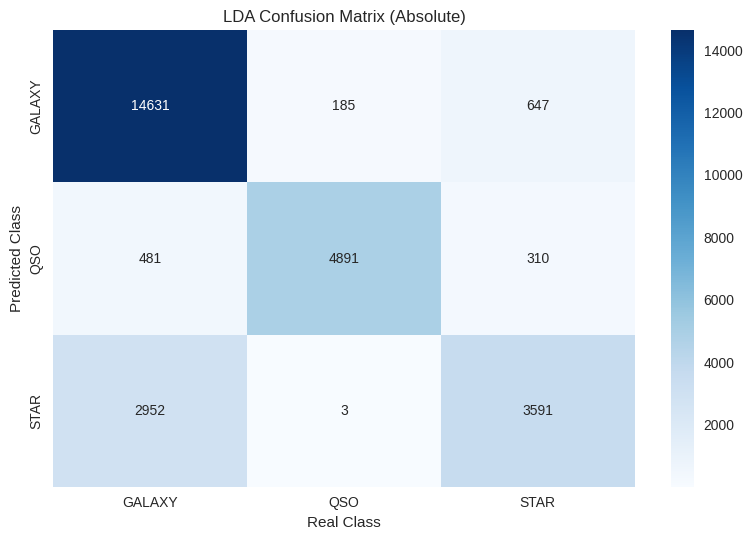

In [19]:
matrix = confusion_matrix(
    y_test, 
    y_pred, 
    labels=classes
)
sns.heatmap(
    matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    yticklabels=classes, 
    xticklabels=classes
)
plt.title("LDA Confusion Matrix (Absolute)")
plt.xlabel("Real Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.savefig("../img/abs-lda-matrix.pdf")
plt.show()


Overall Accuracy in Percentage: 0.83


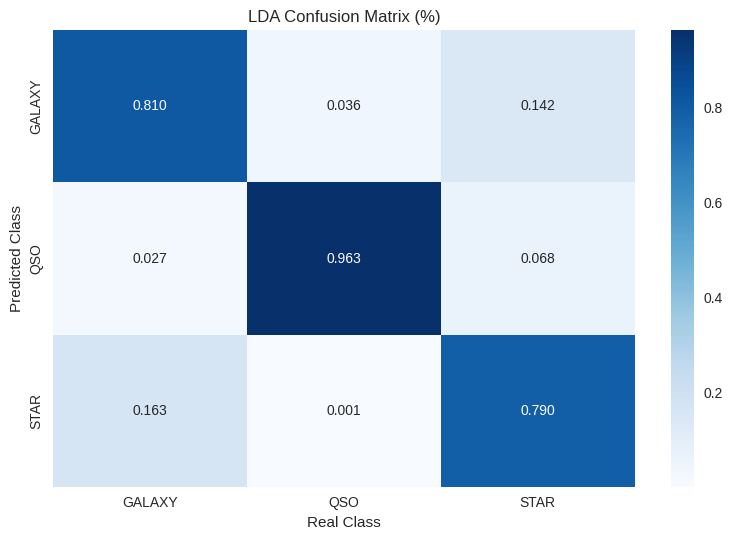

In [20]:
print(f"Overall Accuracy in Percentage: {accuracy_score(y_test, y_pred):.2f}")

matrix = confusion_matrix(
    y_test, 
    y_pred, 
    labels=classes,
    normalize='pred'
)
sns.heatmap(
    matrix, 
    annot=True, 
    fmt=".3f", 
    cmap="Blues", 
    yticklabels=classes, 
    xticklabels=classes
)
plt.title("LDA Confusion Matrix (%)")
plt.xlabel("Real Class")
plt.ylabel("Predicted Class")
plt.tight_layout()
plt.savefig("../img/perc-lda-matrix.pdf")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.81      0.95      0.87     15463
         QSO       0.96      0.86      0.91      5682
        STAR       0.79      0.55      0.65      6546

    accuracy                           0.83     27691
   macro avg       0.85      0.79      0.81     27691
weighted avg       0.84      0.83      0.83     27691

